<a href="https://colab.research.google.com/github/PradeepGundlapalli/Machine-Learning--AI/blob/main/SpeechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install SpeechRecognition


In [15]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Version info.
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [17]:
!apt-get install portaudio19-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (318 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [18]:
!pip install pyaudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.14-cp310-cp310-linux_x86_64.whl size=63859 sha256=2164890add0dd12c2811ba30a7accfcf0a1b2dbc0f603482d800fa5becc04b5e
  Stored in directory: /root/.cache/pip/wheels/d6/21/f4/0b51d41ba79e51b16295cbb096ec49f334792814d545b508c5
Successfully built pyaudio


In [20]:
!pip install sounddevice

In [45]:
# all imports
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream



In [46]:
audio = record(2)

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [47]:
type(audio)


bytes

In [48]:
import IPython.display as ipd

ipd.display(ipd.Audio(audio))

In [69]:
pip install sounddevice pygame


In [61]:
import speech_recognition as sr
import pygame

def speech_to_text(audio):
    # Create a speech recognition object
    recognizer = sr.Recognizer()

    # Load audio file
   # audio_file = sr.AudioFile(audio_file_path)

    # Recognize speech from the audio file
   # with audio_file as source:
      #  audio_data = recognizer.record(source)

      # Capture audio from the microphone


    try:
        # Use Google Web Speech API to convert speech to text
        audio_data = sr.AudioData(audio, sample_rate=16000, sample_width=2)  # Adjust sample_rate and sample_width if needed
        # Convert the NumPy array to a Pygame sound object


        text = recognizer.recognize_google(audio_data)
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"Error with the request to Google Web Speech API; {e}")
        return None

# Replace 'path/to/your/audio/file.wav' with the path to your audio file
#audio_file_path = 'download.wav'
transcribed_text = speech_to_text(audio = record(5))


if transcribed_text:
    print("Transcribed Text:")
    print(transcribed_text)


Speak Now...


<IPython.core.display.Javascript object>

Done Recording !
Sorry, could not understand audio.


In [70]:
import sounddevice as sd
import numpy as np
import pygame

def play_audio(audio_data, sample_rate=44100):
    print("Playing...")

    # Initialize Pygame mixer
    pygame.mixer.init()
    # Convert the NumPy array to a Pygame sound object
    sound = pygame.sndarray.make_sound(audio_data)

    # Play the sound
    sound.play()

    # Wait for the sound to finish playing
    pygame.time.wait(int(audio_data.shape[0] / sample_rate * 1000))

    print("Playback complete.")

def main():
    duration = 5  # Duration of recording in seconds
    sample_rate = 44100  # Sample rate in Hz

    audio_data = record(5)

    # Play the recorded audio
    play_audio(audio_data, sample_rate)

if __name__ == "__main__":
    main()

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !
Playing...


error: ignored

<ipython-input-79-4afa31d3ddd5>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


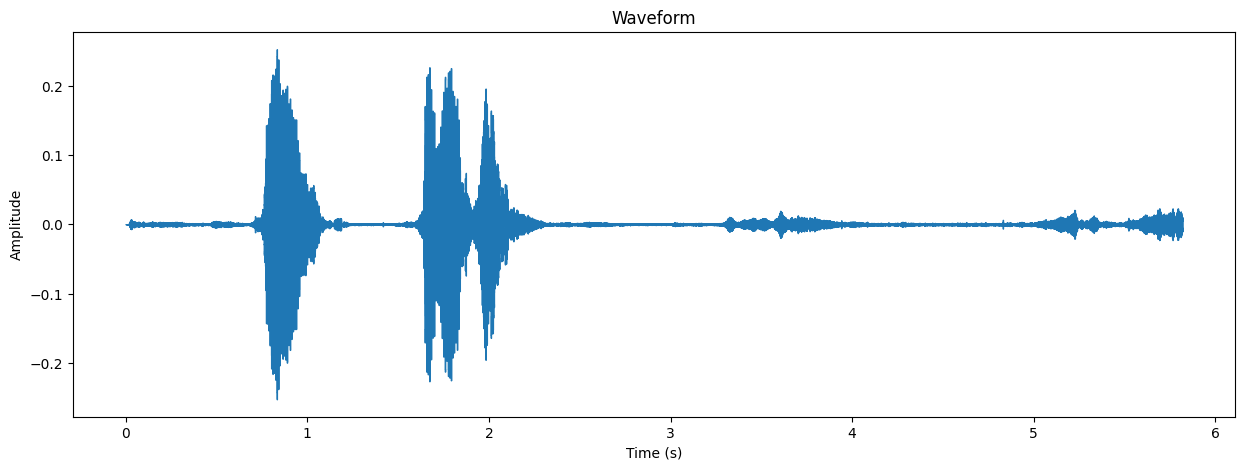

In [79]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def load_audio_file(file_path):
    # Load audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)

    return audio_data, sample_rate

def plot_waveform(audio_data, sample_rate):
    # Plot the waveform
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def main():
    # Replace 'path/to/your/audio/file.wav' with the path to your audio file
    audio_file_path = 'download.wav'

    audio_data, sample_rate = load_audio_file(audio_file_path)

    # Plot the waveform
    plot_waveform(audio_data, sample_rate)

if __name__ == "__main__":
    main()


# New Section